In [30]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

In [32]:
# Download NLTK stopwords if not already installed
nltk.download('stopwords')

# Sample dataframe (replace with your actual dataset)
df = pd.DataFrame({
    'Title': ['The Great Adventure', 'Python Programming', 'Deep Learning Mastery', 'AI Revolution'],
    'Description': [
        'Join in the greatest adventure of your life.',
        'Learn Python from scratch to advanced levels.',
        'Master deep learning techniques and algorithms.',
        'Revolutionary advancements in artificial intelligence.'
    ]
})

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Step 1: Preprocess the text (removing punctuation, stopwords, etc.)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# Apply preprocessing to the titles and descriptions
df['Cleaned_Title'] = df['Title'].apply(preprocess_text)
df['Cleaned_Description'] = df['Description'].apply(preprocess_text)


In [36]:
# Step 2: Perform keyword extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=10)  # Adjust max_features as needed
title_tfidf = vectorizer.fit_transform(df['Cleaned_Title'])
description_tfidf = vectorizer.fit_transform(df['Cleaned_Description'])

# Get top keywords for titles
title_keywords = vectorizer.get_feature_names_out()

# Get the TF-IDF score for each word in the titles
title_keywords_score = title_tfidf.sum(axis=0).A1
title_keyword_score_df = pd.DataFrame(list(zip(title_keywords, title_keywords_score)), columns=['Keyword', 'Score'])
title_keyword_score_df = title_keyword_score_df.sort_values(by='Score', ascending=False)

# Get top keywords for descriptions
description_keywords = vectorizer.get_feature_names_out()
description_keywords_score = description_tfidf.sum(axis=0).A1
description_keyword_score_df = pd.DataFrame(list(zip(description_keywords, description_keywords_score)), columns=['Keyword', 'Score'])
description_keyword_score_df = description_keyword_score_df.sort_values(by='Score', ascending=False)

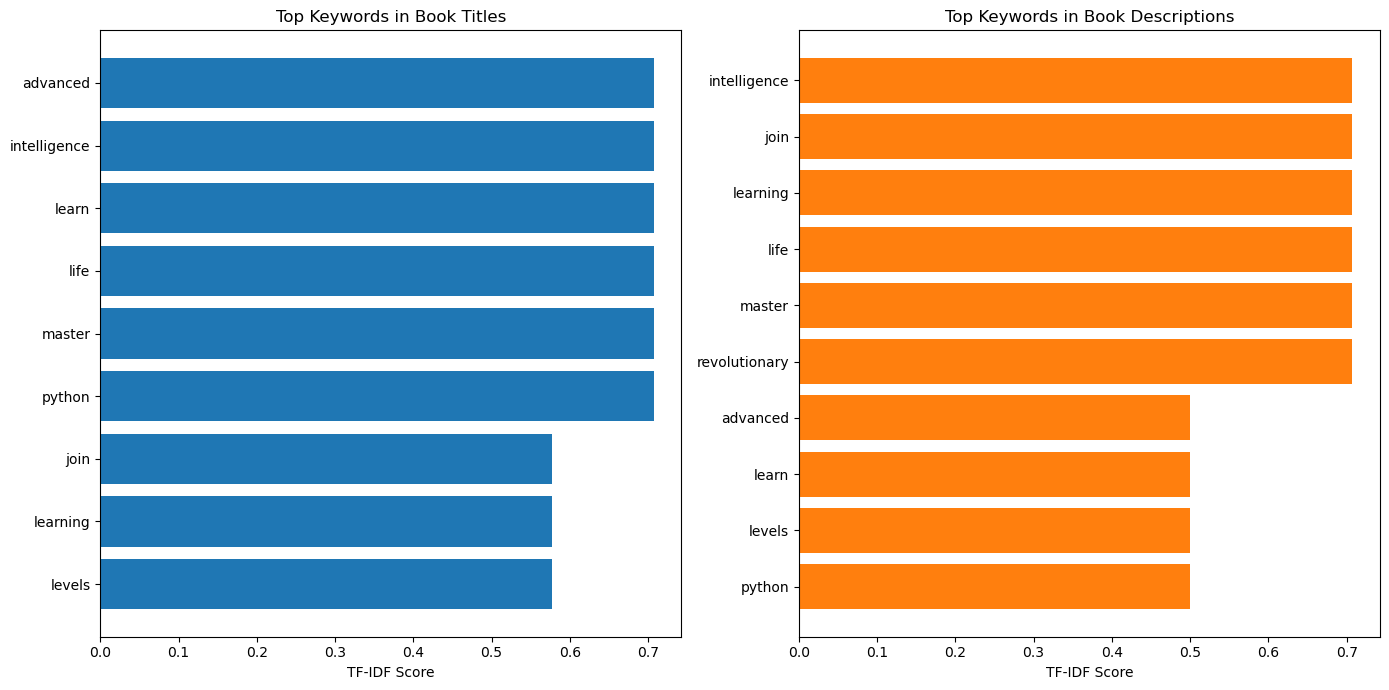

In [42]:
# Step 3: Visualize the most frequent keywords in titles and descriptions
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plotting top keywords in Titles
ax[0].barh(title_keyword_score_df['Keyword'].head(10), title_keyword_score_df['Score'].head(10), color='tab:blue')
ax[0].set_title('Top Keywords in Book Titles')
ax[0].set_xlabel('TF-IDF Score')
ax[0].invert_yaxis()

# Plotting top keywords in Descriptions
ax[1].barh(description_keyword_score_df['Keyword'].head(10), description_keyword_score_df['Score'].head(10), color='tab:orange')
ax[1].set_title('Top Keywords in Book Descriptions')
ax[1].set_xlabel('TF-IDF Score')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()